# **Tarea: simulación y análisis de Paseos Aleatorios Simples.**
Esta tarea tiene como objetivo la implementación y análisis de paseos aleatorios simples en dos escenarios:
1. **Tiempo discreto:** $t\in\{1,2,\ldots,\}$.
2. **Tiempo continuo:** $t\in [0,  \infty)$.

Además, se realizará un **análisis estadístico** del proceso en distintos instantes de tiempo y se utilizará el **método de Montecarlo** para validar las propiedades del proceso.

## **Librerías a utilizar.**
Las librerias a utilizar quedan definidas para poder instalarse en un `requirements.txt` file.

In [67]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## **Parte 1: Paseo Aleatorio Simple en tiempo discreto.**
Un **paseo aleatorio simple** es un proceso estocástico definido por:
$$
S_t = S_{t-1} + X_t, \quad t = 1, 2, 3, \dots
$$

dónde:
- $S_t$  representa la posición en el instante  $t$.
- $X_t$  es una variable aleatoria i.i.d. tales que:
  $$
  X_t =
  \begin{cases} 
  +1, & \text{con probabilidad } \frac{1}{2} \\
  -1, & \text{con probabilidad } \frac{1}{2} 
  \end{cases}
  $$

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo discreto.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.

### Paso 1. Fijar la semilla de reproducibilidad.

In [68]:
np.random.seed(987)

### Paso 2. Definir los parámetros del paseo aleatorio.

In [69]:
n_realizaciones = 200 # Número de realizaciones.
T = 100 # Número de pasos en el tiempo.

In [70]:
X = np.random.choice([-1, 1], size=(n_realizaciones, T)) # Generación de variables aleatorias.
S = np.cumsum(X, axis=1) # Suma acumulada de las realizaciones.
S0 = np.zeros((n_realizaciones, 1)) # Inicialización de la suma acumulada.
S_discreto = np.hstack((S0, S))

### Paso 3. Representación gráfica de las trayectorias.

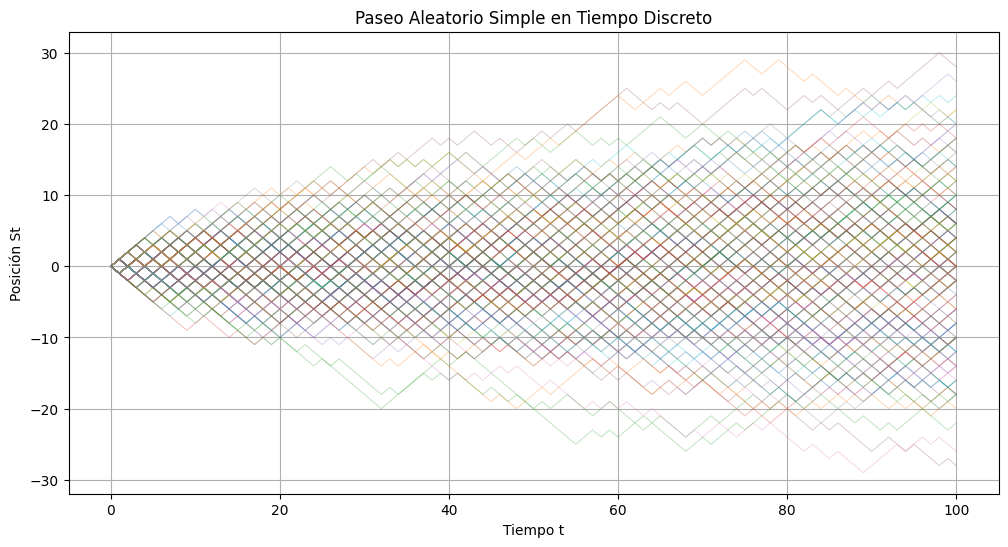

In [71]:
plt.figure(figsize=(12, 6))
for i in range(n_realizaciones):
    plt.plot(np.arange(0, T + 1), S_discreto[i], alpha=0.3, linewidth=0.7)

plt.title("Paseo Aleatorio Simple en Tiempo Discreto")
plt.xlabel("Tiempo t")
plt.ylabel("Posición St")
plt.grid(True)
plt.savefig('results/01_paseo_aleatorio_simple_discreto.png')
plt.show()

## **Parte 2. Paseo Aleatorio Simple en tiempo continuo.**

Consideremos ahora la versión del **paseo aleatorio simple en tiempo continuo** donde $X_t \sim N(0,1)$ son variables aleatorias i.i.d. normales estándar.

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo continuo.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.

### Paso 1. Fijar la semilla de reproducibilidad.

In [72]:
np.random.seed(987)

### Paso 2. Definir los parámetros del paseo aleatorio.

In [73]:
n_realizaciones = 200 # Número de realizaciones.
T = 100 # Número de pasos en el tiempo.

In [74]:
X = np.random.normal(0, 1, size=(n_realizaciones, T)) # Generación de variables aleatorias.
S = np.cumsum(X, axis=1) # Suma acumulada de las realizaciones.
S0 = np.zeros((n_realizaciones, 1)) # Inicialización de la suma acumulada.
S_continuo = np.hstack((S0, S))

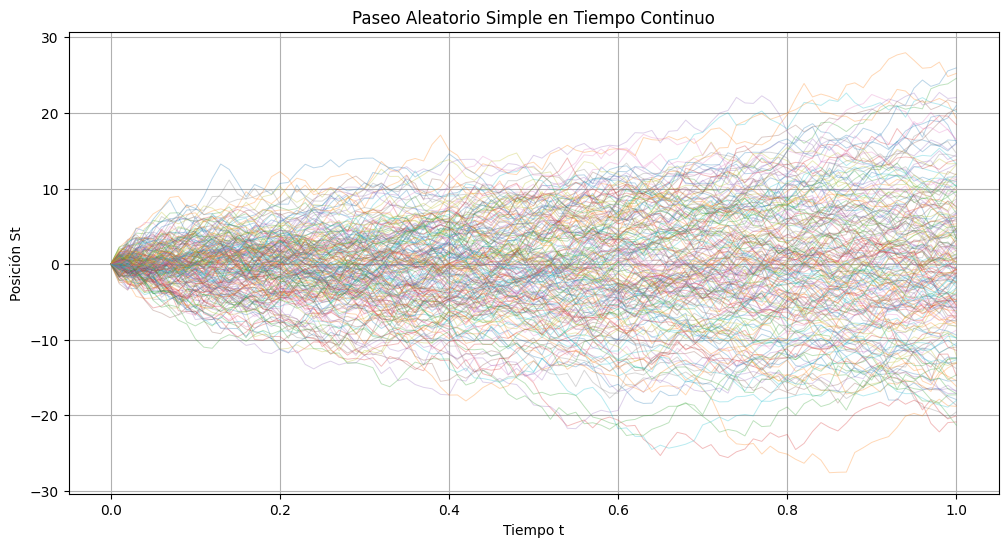

In [75]:
plt.figure(figsize=(12, 6))
for i in range(n_realizaciones):
    plt.plot(np.linspace(0, 1, T + 1), S_continuo[i], alpha=0.3, linewidth=0.7)

plt.title("Paseo Aleatorio Simple en Tiempo Continuo")
plt.xlabel("Tiempo t")
plt.ylabel("Posición St")
plt.grid(True)
plt.savefig('results/02_paseo_aleatorio_simple_continuo.png')
plt.show()

## **Parte 3. Cálculo de Media y Varianza en Instantes Específicos.**

Consideremos ahora el **paseo aleatorio simple en tiempo discreto** de la Parte 1. Para analizar la evolución del proceso, se pide:

1. Calcular la **media muestral** y la **varianza muestral** de  $S_t$  en los tiempos: $t = 5$, $t = 15$ y $t = 25$.
2. Comprobar que los resultados son acordes a lo visto en clase.

### Paso 1. Selección de los instantes específicos.

In [96]:
t_interes = [5, 15, 25] # Tiempos de interés.
S_t_select = S_discreto[:, t_interes] # Selección de las posiciones en los tiempos de interés.

### Paso 2. Calcular media y varianza muestral.

In [97]:
media = np.mean(S_t_select, axis=0)
varianza = np.var(S_t_select, axis=0, ddof=1) # Se utiliza ddof=1 para obtener la varianza muestral.

### Paso 3. Mostrar resultados.

In [98]:
resultados_df = pd.DataFrame({
    "Tiempo t": t_interes,
    "Media Muestral E[S_t]": media,
    "Varianza Muestral Var[S_t]": varianza,
})

In [99]:
resultados_df

,Tiempo t,Media Muestral E[S_t],Varianza Muestral Var[S_t]
0,5,0.02,4.904121
1,15,-0.10,15.185930
2,25,-0.09,22.665226


**Comprobación de los resultados con la teoría.** Según la teoría del **paseo aleatorio simple**, las propiedades esperadas de $S_t$ son:

1. **Esperanza.** $E[S_t] = 0$ . Esto se debe a que los incrementos $X_t$ tienen media **cero**, por lo que la posición esperada en cualquier instante sigue siendo **cero**.

2. **Varianza teórica.** $\text{Var}(S_t) = t$. Dado que los incrementos son independientes y de igual distribución (i.i.d.), la varianza de la posición en el instante t es simplemente **igual a t**.

**Comparación entre resultados muestrales y teoría.**
| Tiempo $ t $ | Media Muestral $ E[S_t] $ | Varianza Muestral $ \text{Var}[S_t] $ | Teoría $ \text{Var}[S_t] = t $ |
|--------------|--------------------|--------------------|-------------------|
| 5            | 0.02 | 4.90 | 5                 |
| 15           | -0.10 | 15.19 | 15                |
| 25           | -0.09 | 22.67 | 25                |

**Conclusión.**
- La **media muestral** en los tiempos seleccionados es **cercana a 0**, lo que es **coherente con la teoría**.
- La **varianza muestral** está **muy cerca** del valor teórico $ \text{Var}(S_t) = t $, lo que confirma que el proceso sigue las propiedades esperadas del paseo aleatorio.

**Los resultados obtenidos concuerdan con lo visto en clase**.

## **Parte 4. Simulaciones de Montecarlo para obtener propiedades estadísticas.**

Repetir 5000 veces la simulación de la Parte 1 (es decir, se generarán 200 realizaciones del paseo aleatorio simple discreto en cada repetición). Para cada experimento:

1. Se generarán 200 realizaciones del paseo aleatorio simple discreto.
2. Se calcularán las medias muestrales y varianzas muestrales en $t = 5$, $t = 15$ y $t = 25$.
3. Se almacenarán los valores de media y varianza obtenidos en cada una de las 5000 repeticiones.

Al finalizar, se calcularán:

1. La media de las 5000 medias muestrales para cada $ t $.
2. La media de las 5000 varianzas muestrales para cada $ t $.

**Preguntas para reflexionar.**
- ¿Hacia qué valores esperas que converjan la media y la varianza muestral?
- ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?
- ¿Cómo podrías verificar la ley de los grandes números en este contexto?

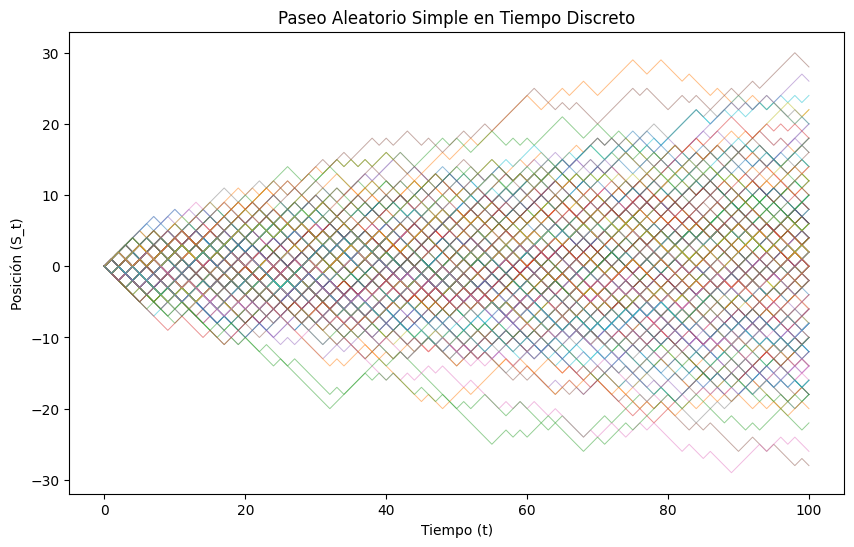

Tiempo 5: Media = 0.0200, Varianza = 4.8796
Tiempo 15: Media = -0.1000, Varianza = 15.1100
Tiempo 25: Media = -0.0900, Varianza = 22.5519


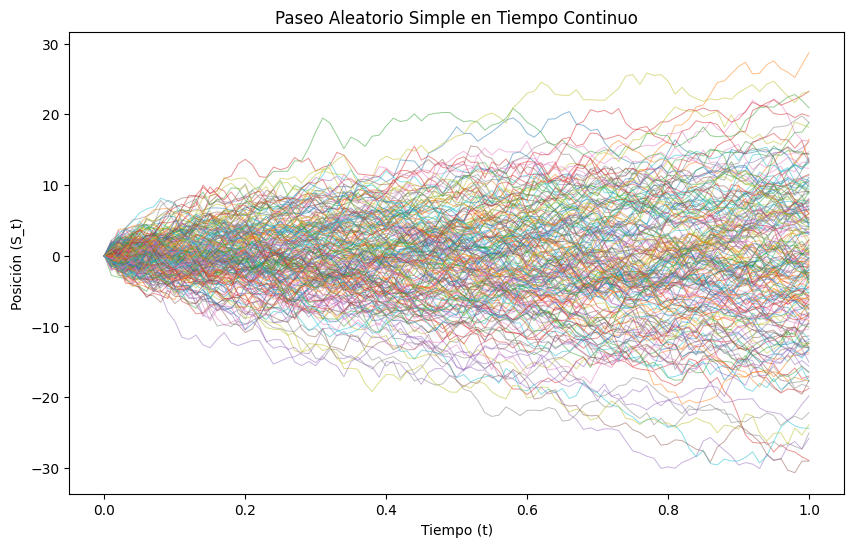

Montecarlo - Tiempo 5: Media de medias = 0.0007,                Media de varianzas = 4.9782
Montecarlo - Tiempo 15: Media de medias = 0.0006,                Media de varianzas = 14.9621
Montecarlo - Tiempo 25: Media de medias = -0.0018,                Media de varianzas = 24.9117


In [100]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(987)

num_realizaciones = 200  # Número de simulaciones
num_pasos = 100  # Número de pasos del paseo aleatorio
num_experimentos = 5000  # Número de repeticiones de Montecarlo
tiempos_especificos = [5, 15, 25]

def paseo_aleatorio_discreto():
    X = np.random.choice([-1, 1], size=(num_realizaciones, num_pasos))  # Generamos pasos aleatorios
    S = np.cumsum(X, axis=1)  # Calculamos la trayectoria acumulada

    S = np.hstack((np.zeros((num_realizaciones, 1)), S))

    # Graficar las trayectorias
    plt.figure(figsize=(10, 6))
    for i in range(num_realizaciones):
        plt.plot(S[i], alpha=0.5, linewidth=0.7)

    plt.xlabel("Tiempo (t)")
    plt.ylabel("Posición (S_t)")
    plt.title("Paseo Aleatorio Simple en Tiempo Discreto")
    plt.show()

    # Cálculo de media y varianza en tiempos específicos
    for t in tiempos_especificos:
        media_t = np.mean(S[:, t])
        varianza_t = np.var(S[:, t])
        print(f"Tiempo {t}: Media = {media_t:.4f}, Varianza = {varianza_t:.4f}")

def paseo_aleatorio_continuo():
    # Generar los paseos aleatorios en tiempo continuo
    tiempo = np.linspace(0, 1, num_pasos + 1)  # Tiempo continuo
    X = np.random.normal(0, 1, size=(num_realizaciones, num_pasos))  # Generamos pasos normales estándar
    S = np.cumsum(X, axis=1)  # Calculamos la trayectoria acumulada
    S = np.hstack((np.zeros((num_realizaciones, 1)), S))

    plt.figure(figsize=(10, 6))
    for i in range(num_realizaciones):
        plt.plot(tiempo, S[i], alpha=0.5, linewidth=0.7)

    plt.xlabel("Tiempo (t)")
    plt.ylabel("Posición (S_t)")
    plt.title("Paseo Aleatorio Simple en Tiempo Continuo")
    plt.show()

def montecarlo_paseo_aleatorio():
    medias_muestrales = {t: [] for t in tiempos_especificos}
    varianzas_muestrales = {t: [] for t in tiempos_especificos}

    for _ in range(num_experimentos):
        X = np.random.choice([-1, 1], size=(num_realizaciones, num_pasos))
        S = np.cumsum(X, axis=1)
        S = np.hstack((np.zeros((num_realizaciones, 1)), S))
        
        for t in tiempos_especificos:
            medias_muestrales[t].append(np.mean(S[:, t]))
            varianzas_muestrales[t].append(np.var(S[:, t]))
    
    for t in tiempos_especificos:
        print(f"Montecarlo - Tiempo {t}: Media de medias = {np.mean(medias_muestrales[t]):.4f}, \
               Media de varianzas = {np.mean(varianzas_muestrales[t]):.4f}")
        
paseo_aleatorio_discreto()
paseo_aleatorio_continuo()
montecarlo_paseo_aleatorio()